In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def create_mask(path, color_threshold):
    """
    create a binary mask of an image using a color threshold
    args:
    - path [str]: path to image file
    - color_threshold [array]: 1x3 array of RGB value
    returns:
    - img [array]: RGB image array
    - mask [array]: binary array
    """
    img = np.array(Image.open(path).convert('RGB'))
    R, G, B = img[..., 0], img[..., 1], img[..., 2]
    rt, gt, bt = color_threshold
    mask = (R > rt) & (G > gt) & (B > bt) 
    return img, mask


def mask_and_display(img, mask):
    """
    display 3 plots next to each other: image, mask and masked image
    args:
    - img [array]: HxWxC image array
    - mask [array]: HxW mask array
    """
    masked_image = img * np.stack([mask]*3, axis=2)
    f, ax = plt.subplots(1, 3, figsize=(15, 10))
    ax[0].imshow(img)
    ax[1].imshow(mask)
    ax[2].imshow(masked_image)
    plt.show()

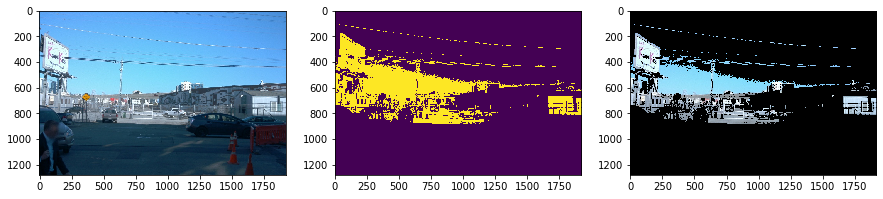

In [2]:
path = '../data/images/segment-1231623110026745648_480_000_500_000_with_camera_labels_38.png'
color_threshold = [128, 128, 128]

img, mask = create_mask(path, color_threshold)
mask_and_display(img, mask)

In [3]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image, ImageStat

from utils import check_results


def calculate_mean_std(image_list):
    """
    calculate mean and std of image list
    args:
    - image_list [list[str]]: list of image paths
    returns:
    - mean [array]: 1x3 array of float, channel wise mean
    - std [array]: 1x3 array of float, channel wise std
    """
    means = []
    stds = []
    
    for path in image_list:
        img = Image.open(path).convert('RGB')
        stat = ImageStat.Stat(img)
        means.append(np.array(stat.mean))
        stds.append(np.array(stat.var)**0.5)
    
    total_mean = np.mean(means, axis=0)
    total_std = np.mean(stds, axis=0)

    return total_mean, total_std


def channel_histogram(image_list):
    """
    calculate channel wise pixel value
    args:
    - image_list [list[str]]: list of image paths
    """
    red = []
    green = []
    blue = []
    
    for path in image_list:
        img = np.array(Image.open(path).convert('RGB'))
        R, G, B = img[..., 0], img[..., 1], img[..., 2]
        red.extend(R.flatten().tolist())
        green.extend(G.flatten().tolist())
        blue.extend(B.flatten().tolist())
    
    plt.figure()
    sns.kdeplot(red, color='r')
    sns.kdeplot(green, color='g')
    sns.kdeplot(blue, color='b')
    plt.show()

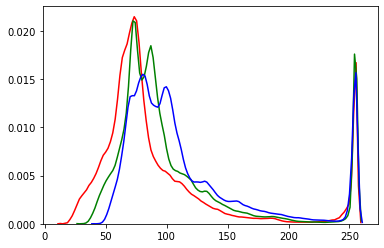

Congrats, all calculations are correct!


In [5]:
image_list = glob.glob('../data/images/*')

mean, std = calculate_mean_std(image_list)
channel_histogram(image_list[:2])

check_results(mean, std)